# 1.5 Exercise 5 - Code on a quantum computer with cloud platform IBM Q
As you may have noticed, all our tests up until now have only been running on simulators being either 'qasm_simulator' or the 'statevector_simulator'.<br>

The simulators are fine for running basic Quantum Circuits or for testing your code, before sending it off to a real Quantum Computer. So, now that we have gone throug several examples using simulators, let's do some examples with real Quantum Computers via our cloud platform, IBM Q!<br>

---
## 1.5.0 Import of libraries for the program

In [1]:
# Full import of Qiskit library
from qiskit import *

# Method import to find the least busy quantum computer
from qiskit.providers.ibmq import least_busy

# Method import to monitor monitor Quantum Execution in real time
from qiskit.tools.monitor import job_monitor

<div class="alert alert-info" role="alert">
  <strong>Notice!</strong> Before you can connect to the IBM Q cloud platform and use the Quantum Computers, you need to load your API token from your Account:
    
1. Follow this link, <a href="https://quantumexperience.ng.bluemix.net/qx/account/advanced">QuantumExperience</a>, to either sign-up/sign-in to retrieve your API token. 
<br> [**!! Here is a guide !!**](./Appendix%20-%20Create%20user%20%26%20Get%20API%20Token.ipynb)
2. Insert the API token in the section marked Your_Key_Here in the cell below. 
3. Don't delete the "".

</div>

In [2]:
API_Token = "Your_Api_Key"

4. If this is your **first time** using this API token, please uncomment

        IBMQ.save_account(API_Token, overwrite=True)
    by deleting the # symbol in front of the line. 

    For future runs you should comment out the line again, by adding the # symbol again. The line should then read:
    
        #IBMQ.save_account(API_Token, overwrite=True)

In [5]:
# Save the account so we can use it with IBMQ
IBMQ.save_account(API_Token, overwrite=True)

5. When the step above has been executed, we move on to loading the account.

    To avoid errors when the page first loads (aka. before you have entered you API Token), we have commentet out command here as well. Go ahead and remove the # symbol here as well. The line in question should read:
    
        IBMQ.load_accounts()

In [ ]:
# This will register which account we are using
provider =IBMQ.get_provider();

6. To use the least busy Quantum Computer for our experiements below, we define the device like this

    This might fail if your account wasn't loaded propperly or if there is a problem with the API Token.

In [ ]:
device = least_busy(provider.backends(simulator=False))

---
## 1.5.1 The Quantum Circuit

This step is just business as usual with initiating our Quantum Circuit. 

<strong style="color: orange;">Firstly</strong>, we initiate our quantum program with the three main compontents:

In [ ]:
# Create a Quantum Register with 2 qubits.
qr = QuantumRegister(2)

# Create a classical register with 2 bits
cr = ClassicalRegister(2)

# Create a Quantum Circuit containing our QR and CR. 
circuit = QuantumCircuit(qr,cr)

# Prepare the method to draw our quantum program
circuit.draw();

---
## 1.5.2 Adding operations to the Quantum Circuit
<strong style="color: orange;">Secondly</strong>, as an example, we will use a [x]-gate - _but feel free to use whichever gate you want to try on the real Quantum Computer!_

In [ ]:
# Adding a single [x]-gate to one of the two Quantum Registers
circuit.x(qr[0]);

# Adding a barrier for visualising purposes
circuit.barrier()

# Adding the measurement operation to all Quantum Registers
circuit.measure(qr, cr);

---
## 1.5.3 Visualising the Quantum Circuit 
<strong style="color: orange;">Thirdly</strong>, we want to view our Quantum Circuit to see, if it resembles what we had in mind: One [x]-gate first, followed by two measurement operations.

In [ ]:
circuit.draw(output='mpl')

---
## 1.5.4 Run the Quantum Program
<strong style="color: orange;">Fourthly</strong>, as mentioned earlier we run our Quantum Program on the least busy Quantum Computer. Unfortunatly, there you might not be the only one in line. After running the code below, you should see an output with the status of your job. This might take a little while, depending on how busy the machines are. So grab a cup of coffee, reflect on what you have learned so far or ask the person sitting next to you, what you have found to be the most challenging part of this workshop so far. 

In [ ]:
# We excecute the job on the choosen backend
job = execute(circuit, device)

# The job monitor makes it possible for us to monitor our job in real time
job_monitor(job)

Job Status: job is queued (29)      

When the Job Status says "job has successfully run", we will use the code below to retrieve the output.

In [ ]:
job_result = job.result()
counts = job_result.get_counts(circuit)

---
## 1.5.5 Visualize the Result!
<strong style="color: orange;">Lastly</strong>, let's use the histogram to, yet again, visualize the output from our Quantum Device.

In [20]:
from qiskit.tools.visualization import plot_histogram

Which then can be used to create our visualization:

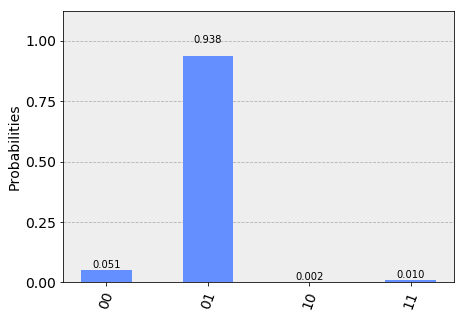

In [21]:
plot_histogram(counts)

If you followed our example and chose to add a single [x]-gate to the first Qubit, you should see a strong tendency towards the result 01. 

Because Quantum Computing is about statistics, you might also see some weak tendencys towards other answers. This is part of Quantum Computing, the results we get are rarely 100% certain, instead we're looking for tendencies and how to amplify them. 

---
<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
    <p><b>Aww yeah</b>, you should now have successfully created a few Quantum Circuits, used different types of Quantum Gates and even have tested your code on a real Quantum Computer in the cloud!<br><br>

**But!** We are not done yet!<br><br>

We will move on to making a minor Quantum Program and then move on to fiddling with some of the larger and best-known Quantum Algorithms.
</p>
</div>

---
## Let's move on to the last Notebook we go through together!
[1.6 Exercise 6 - Random Number Generator](1.6%20-%20Random%20Number%20Generator.ipynb)